In [1]:
import random
import matplotlib.pyplot as plt

from keras import models
from keras import layers
from keras import optimizers
from keras import regularizers
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
random.seed(1234)
#load data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

#transform image data into 2d-tensor
x_train = x_train.reshape((60000, 28*28))
x_train = x_train.astype('float32') / 255

x_test = x_test.reshape((10000, 28*28))
x_test = x_test.astype('float32')/ 255

#make y categorical type
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#split train set into train sand validation
x_train_50000, x_val, y_train_50000, y_val = train_test_split(x_train, y_train, test_size = 1/6, random_state = 1)

#check shapes
print(x_train.shape, y_train.shape, 
      x_train_50000.shape, y_train_50000.shape,
      x_val.shape, y_val.shape, x_test.shape, y_test.shape)

(60000, 784) (60000, 10) (50000, 784) (50000, 10) (10000, 784) (10000, 10) (10000, 784) (10000, 10)


three settings 

layers: 5, 10
units: 256, 512, 1024
L2 = 0.001

in total 12 settings

In [3]:
# Model 1 --> layer 5, units 128, no l2 reg, 200 epchs

model_1 = models.Sequential()
model_1.add(layers.Dense(128, activation = 'relu', input_shape=(784,)))
model_1.add(layers.Dense(128, activation = 'relu'))
model_1.add(layers.Dense(128, activation = 'relu'))
model_1.add(layers.Dense(128, activation = 'relu'))
model_1.add(layers.Dense(128, activation = 'relu'))
model_1.add(layers.Dense(10, activation = 'softmax'))

model_1.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

history_1 = model_1.fit(x_train_50000, y_train_50000, 
                    batch_size = 512, epochs = 200,
                    validation_data = (x_val, y_val), verbose = 0)

history_dict_1 = history_1.history
loss_1 = history_dict_1['val_loss']
acc_1 = history_dict_1['val_acc']

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [4]:
#Model 2 layer 5, units 256, no l2

model_2 = models.Sequential()
model_2.add(layers.Dense(256, activation = 'relu', input_shape=(784,)))
model_2.add(layers.Dense(256, activation = 'relu'))
model_2.add(layers.Dense(256, activation = 'relu'))
model_2.add(layers.Dense(256, activation = 'relu'))
model_2.add(layers.Dense(256, activation = 'relu'))
model_2.add(layers.Dense(10, activation = 'softmax'))

model_2.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

history_2 = model_2.fit(x_train_50000, y_train_50000, 
                    batch_size = 512, epochs = 200,
                    validation_data = (x_val, y_val), verbose = 0)

history_dict_2 = history_2.history
loss_2 = history_dict_2['val_loss']
acc_2 = history_dict_2['val_acc']

In [5]:
# Model 3 layer 5, units 512, no l2 
model_3 = models.Sequential()
model_3.add(layers.Dense(512, activation = 'relu', input_shape=(784,)))
model_3.add(layers.Dense(512, activation = 'relu'))
model_3.add(layers.Dense(512, activation = 'relu'))
model_3.add(layers.Dense(512, activation = 'relu'))
model_3.add(layers.Dense(512, activation = 'relu'))
model_3.add(layers.Dense(10, activation = 'softmax'))

model_3.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

history_3 = model_3.fit(x_train_50000, y_train_50000, 
                    batch_size = 512, epochs = 200,
                    validation_data = (x_val, y_val), verbose = 0)

history_dict_3 = history_3.history
loss_3 = history_dict_3['val_loss']
acc_3 = history_dict_3['val_acc']

In [6]:
# Model 4 layer 5, units 128, l2 reg 0.001
model_4 = models.Sequential()
model_4.add(layers.Dense(128, activation = 'relu', 
                         input_shape=(784,),
                         kernel_regularizer = regularizers.l2(0.001)))

model_4.add(layers.Dense(128, activation = 'relu', 
                         kernel_regularizer = regularizers.l2(0.001)))

model_4.add(layers.Dense(128, activation = 'relu', 
                         kernel_regularizer = regularizers.l2(0.001)))

model_4.add(layers.Dense(128, activation = 'relu', 
                         kernel_regularizer = regularizers.l2(0.001)))

model_4.add(layers.Dense(128, activation = 'relu', 
                         kernel_regularizer = regularizers.l2(0.001)))

model_4.add(layers.Dense(10, activation = 'softmax'))

model_4.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

history_4 = model_4.fit(x_train_50000, y_train_50000, 
                    batch_size = 512, epochs = 200,
                    validation_data = (x_val, y_val), verbose = 0)

history_dict_4 = history_4.history
loss_4 = history_dict_4['val_loss']
acc_4 = history_dict_4['val_acc']

In [7]:
# Model 5 layer 5 units 256 l2 reg 0.001
model_5 = models.Sequential()
model_5.add(layers.Dense(256, activation = 'relu', 
                         input_shape=(784,),
                         kernel_regularizer = regularizers.l2(0.001)))

model_5.add(layers.Dense(256, activation = 'relu', 
                         kernel_regularizer = regularizers.l2(0.001)))

model_5.add(layers.Dense(256, activation = 'relu', 
                         kernel_regularizer = regularizers.l2(0.001)))

model_5.add(layers.Dense(256, activation = 'relu', 
                         kernel_regularizer = regularizers.l2(0.001)))

model_5.add(layers.Dense(256, activation = 'relu', 
                         kernel_regularizer = regularizers.l2(0.001)))

model_5.add(layers.Dense(10, activation = 'softmax'))

model_5.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

history_5 = model_5.fit(x_train_50000, y_train_50000, 
                    batch_size = 512, epochs = 200,
                    validation_data = (x_val, y_val), verbose = 0)

history_dict_5 = history_5.history
loss_5 = history_dict_5['val_loss']
acc_5 = history_dict_5['val_acc']

In [8]:
# Model 6 layer 5 units 512 l2 reg 0.001
model_6 = models.Sequential()
model_6.add(layers.Dense(512, activation = 'relu', 
                         input_shape=(784,),
                         kernel_regularizer = regularizers.l2(0.001)))

model_6.add(layers.Dense(512, activation = 'relu', 
                         kernel_regularizer = regularizers.l2(0.001)))

model_6.add(layers.Dense(512, activation = 'relu', 
                         kernel_regularizer = regularizers.l2(0.001)))

model_6.add(layers.Dense(512, activation = 'relu', 
                         kernel_regularizer = regularizers.l2(0.001)))

model_6.add(layers.Dense(512, activation = 'relu', 
                         kernel_regularizer = regularizers.l2(0.001)))

model_6.add(layers.Dense(10, activation = 'softmax'))

model_6.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

history_6 = model_6.fit(x_train_50000, y_train_50000, 
                    batch_size = 512, epochs = 200,
                    validation_data = (x_val, y_val), verbose = 0)

history_dict_6 = history_6.history
loss_6 = history_dict_6['val_loss']
acc_6 = history_dict_6['val_acc']

In [9]:
# Model 7 layer 10, units 128 l2 0
model_7 = models.Sequential()
model_7.add(layers.Dense(128, activation = 'relu', input_shape=(784,)))
model_7.add(layers.Dense(128, activation = 'relu'))
model_7.add(layers.Dense(128, activation = 'relu'))
model_7.add(layers.Dense(128, activation = 'relu'))
model_7.add(layers.Dense(128, activation = 'relu'))
model_7.add(layers.Dense(128, activation = 'relu'))
model_7.add(layers.Dense(128, activation = 'relu'))
model_7.add(layers.Dense(128, activation = 'relu'))
model_7.add(layers.Dense(128, activation = 'relu'))
model_7.add(layers.Dense(128, activation = 'relu'))
model_7.add(layers.Dense(10, activation = 'softmax'))

model_7.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

history_7 = model_7.fit(x_train_50000, y_train_50000, 
                    batch_size = 512, epochs = 200,
                    validation_data = (x_val, y_val), verbose = 0)

history_dict_7 = history_7.history
loss_7 = history_dict_7['val_loss']
acc_7 = history_dict_7['val_acc']

In [10]:
# Model 8 layer 10, units 256 l2 0

model_8 = models.Sequential()
model_8.add(layers.Dense(256, activation = 'relu', input_shape=(784,)))
model_8.add(layers.Dense(256, activation = 'relu'))
model_8.add(layers.Dense(256, activation = 'relu'))
model_8.add(layers.Dense(256, activation = 'relu'))
model_8.add(layers.Dense(256, activation = 'relu'))
model_8.add(layers.Dense(256, activation = 'relu'))
model_8.add(layers.Dense(256, activation = 'relu'))
model_8.add(layers.Dense(256, activation = 'relu'))
model_8.add(layers.Dense(256, activation = 'relu'))
model_8.add(layers.Dense(256, activation = 'relu'))
model_8.add(layers.Dense(10, activation = 'softmax'))

model_8.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

history_8 = model_8.fit(x_train_50000, y_train_50000, 
                    batch_size = 512, epochs = 200,
                    validation_data = (x_val, y_val), verbose = 0)

history_dict_8 = history_8.history
loss_8 = history_dict_8['val_loss']
acc_8 = history_dict_8['val_acc']

In [11]:
# Model 9 layer 10 units 512
model_9 = models.Sequential()
model_9.add(layers.Dense(512, activation = 'relu', input_shape=(784,)))
model_9.add(layers.Dense(512, activation = 'relu'))
model_9.add(layers.Dense(512, activation = 'relu'))
model_9.add(layers.Dense(512, activation = 'relu'))
model_9.add(layers.Dense(512, activation = 'relu'))
model_9.add(layers.Dense(512, activation = 'relu'))
model_9.add(layers.Dense(512, activation = 'relu'))
model_9.add(layers.Dense(512, activation = 'relu'))
model_9.add(layers.Dense(512, activation = 'relu'))
model_9.add(layers.Dense(512, activation = 'relu'))
model_9.add(layers.Dense(10, activation = 'softmax'))

model_9.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

history_9 = model_9.fit(x_train_50000, y_train_50000, 
                    batch_size = 512, epochs = 200,
                    validation_data = (x_val, y_val), verbose = 0)

history_dict_9 = history_9.history
loss_9 = history_dict_9['val_loss']
acc_9 = history_dict_9['val_acc']

In [12]:
# Model 10 layer 10 units 128 l2 0.001
model_10 = models.Sequential()
model_10.add(layers.Dense(128, activation = 'relu', 
                         input_shape=(784,),
                         kernel_regularizer = regularizers.l2(0.001)))

model_10.add(layers.Dense(128, activation = 'relu', 
                         kernel_regularizer = regularizers.l2(0.001)))

model_10.add(layers.Dense(128, activation = 'relu', 
                         kernel_regularizer = regularizers.l2(0.001)))

model_10.add(layers.Dense(128, activation = 'relu', 
                         kernel_regularizer = regularizers.l2(0.001)))

model_10.add(layers.Dense(128, activation = 'relu', 
                         kernel_regularizer = regularizers.l2(0.001)))

model_10.add(layers.Dense(128, activation = 'relu', 
                         kernel_regularizer = regularizers.l2(0.001)))

model_10.add(layers.Dense(128, activation = 'relu', 
                         kernel_regularizer = regularizers.l2(0.001)))

model_10.add(layers.Dense(128, activation = 'relu', 
                         kernel_regularizer = regularizers.l2(0.001)))

model_10.add(layers.Dense(128, activation = 'relu', 
                         kernel_regularizer = regularizers.l2(0.001)))

model_10.add(layers.Dense(128, activation = 'relu', 
                         kernel_regularizer = regularizers.l2(0.001)))

model_10.add(layers.Dense(10, activation = 'softmax'))

model_10.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

history_10 = model_10.fit(x_train_50000, y_train_50000, 
                    batch_size = 512, epochs = 200,
                    validation_data = (x_val, y_val), verbose = 0)

history_dict_10 = history_10.history
loss_10 = history_dict_10['val_loss']
acc_10 = history_dict_10['val_acc']

In [13]:
# Model 11 layer 10 units 512 l2 0.001
model_11 = models.Sequential()
model_11.add(layers.Dense(256, activation = 'relu', 
                         input_shape=(784,),
                         kernel_regularizer = regularizers.l2(0.001)))

model_11.add(layers.Dense(256, activation = 'relu', 
                         kernel_regularizer = regularizers.l2(0.001)))

model_11.add(layers.Dense(256, activation = 'relu', 
                         kernel_regularizer = regularizers.l2(0.001)))

model_11.add(layers.Dense(256, activation = 'relu', 
                         kernel_regularizer = regularizers.l2(0.001)))

model_11.add(layers.Dense(256, activation = 'relu', 
                         kernel_regularizer = regularizers.l2(0.001)))

model_11.add(layers.Dense(256, activation = 'relu', 
                         kernel_regularizer = regularizers.l2(0.001)))

model_11.add(layers.Dense(256, activation = 'relu', 
                         kernel_regularizer = regularizers.l2(0.001)))

model_11.add(layers.Dense(256, activation = 'relu', 
                         kernel_regularizer = regularizers.l2(0.001)))

model_11.add(layers.Dense(256, activation = 'relu', 
                         kernel_regularizer = regularizers.l2(0.001)))

model_11.add(layers.Dense(256, activation = 'relu', 
                         kernel_regularizer = regularizers.l2(0.001)))

model_11.add(layers.Dense(10, activation = 'softmax'))

model_11.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

history_11 = model_11.fit(x_train_50000, y_train_50000, 
                    batch_size = 512, epochs = 200,
                    validation_data = (x_val, y_val), verbose = 0)

history_dict_11 = history_11.history
loss_11 = history_dict_11['val_loss']
acc_11 = history_dict_11['val_acc']

In [14]:
# model 12   layer 10 units 1024 l2 0.001
model_12 = models.Sequential()
model_12.add(layers.Dense(512, activation = 'relu', 
                         input_shape=(784,),
                         kernel_regularizer = regularizers.l2(0.001)))

model_12.add(layers.Dense(512, activation = 'relu', 
                         kernel_regularizer = regularizers.l2(0.001)))

model_12.add(layers.Dense(512, activation = 'relu', 
                         kernel_regularizer = regularizers.l2(0.001)))

model_12.add(layers.Dense(512, activation = 'relu', 
                         kernel_regularizer = regularizers.l2(0.001)))

model_12.add(layers.Dense(512, activation = 'relu', 
                         kernel_regularizer = regularizers.l2(0.001)))

model_12.add(layers.Dense(512, activation = 'relu', 
                         kernel_regularizer = regularizers.l2(0.001)))

model_12.add(layers.Dense(512, activation = 'relu', 
                         kernel_regularizer = regularizers.l2(0.001)))

model_12.add(layers.Dense(512, activation = 'relu', 
                         kernel_regularizer = regularizers.l2(0.001)))

model_12.add(layers.Dense(512, activation = 'relu', 
                         kernel_regularizer = regularizers.l2(0.001)))

model_12.add(layers.Dense(512, activation = 'relu', 
                         kernel_regularizer = regularizers.l2(0.001)))

model_12.add(layers.Dense(10, activation = 'softmax'))

model_12.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

history_12 = model_12.fit(x_train_50000, y_train_50000, 
                    batch_size = 512, epochs = 200,
                    validation_data = (x_val, y_val), verbose = 0)

history_dict_12 = history_12.history
loss_12 = history_dict_12['val_loss']
acc_12 = history_dict_12['val_acc']

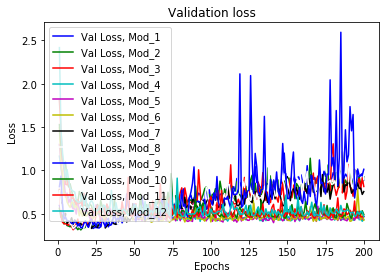

In [15]:
#drawing loss score

epochs = range(1, 201)

plt.plot(epochs, loss_1, 'b', label = "Val Loss, Mod_1")
plt.plot(epochs, loss_2, 'g', label = "Val Loss, Mod_2")
plt.plot(epochs, loss_3, 'r', label = "Val Loss, Mod_3")
plt.plot(epochs, loss_4, 'c', label = "Val Loss, Mod_4")
plt.plot(epochs, loss_5, 'm', label = "Val Loss, Mod_5")
plt.plot(epochs, loss_6, 'y', label = "Val Loss, Mod_6")
plt.plot(epochs, loss_7, 'k', label = "Val Loss, Mod_7")
plt.plot(epochs, loss_8, 'w', label = "Val Loss, Mod_8")
plt.plot(epochs, loss_9, 'b', label = "Val Loss, Mod_9")
plt.plot(epochs, loss_10, 'g', label = "Val Loss, Mod_10")
plt.plot(epochs, loss_11, 'r', label = "Val Loss, Mod_11")
plt.plot(epochs, loss_12, 'c', label = "Val Loss, Mod_12")

plt.title("Validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

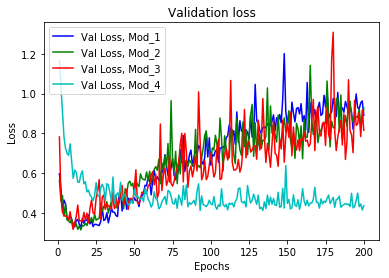

In [17]:
plt.clf()

epochs = range(1, 201)

plt.plot(epochs, loss_1, 'b', label = "Val Loss, Mod_1")
plt.plot(epochs, loss_2, 'g', label = "Val Loss, Mod_2")
plt.plot(epochs, loss_3, 'r', label = "Val Loss, Mod_3")
plt.plot(epochs, loss_4, 'c', label = "Val Loss, Mod_4")

plt.title("Validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Based on this graph, I decided to ditch model 1, 2, 3.

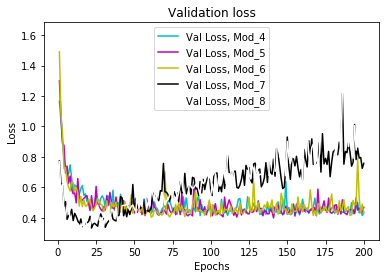

In [18]:
plt.clf()

epochs = range(1, 201)

plt.plot(epochs, loss_4, 'c', label = "Val Loss, Mod_4")
plt.plot(epochs, loss_5, 'm', label = "Val Loss, Mod_5")
plt.plot(epochs, loss_6, 'y', label = "Val Loss, Mod_6")
plt.plot(epochs, loss_7, 'k', label = "Val Loss, Mod_7")
plt.plot(epochs, loss_8, 'w', label = "Val Loss, Mod_8")

plt.title("Validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Based on this, I decided to dtch model 7 and 8. 

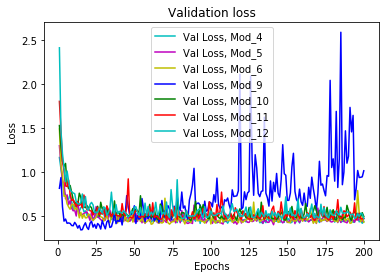

In [19]:
plt.clf()

epochs = range(1, 201)

plt.plot(epochs, loss_4, 'c', label = "Val Loss, Mod_4")
plt.plot(epochs, loss_5, 'm', label = "Val Loss, Mod_5")
plt.plot(epochs, loss_6, 'y', label = "Val Loss, Mod_6")
plt.plot(epochs, loss_9, 'b', label = "Val Loss, Mod_9")
plt.plot(epochs, loss_10, 'g', label = "Val Loss, Mod_10")
plt.plot(epochs, loss_11, 'r', label = "Val Loss, Mod_11")
plt.plot(epochs, loss_12, 'c', label = "Val Loss, Mod_12")

plt.title("Validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Based on this, I decided to abandon model 9

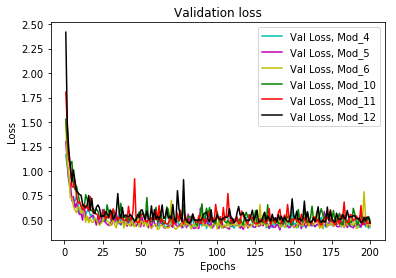

In [21]:
plt.clf()

epochs = range(1, 201)

plt.plot(epochs, loss_4, 'c', label = "Val Loss, Mod_4")
plt.plot(epochs, loss_5, 'm', label = "Val Loss, Mod_5")
plt.plot(epochs, loss_6, 'y', label = "Val Loss, Mod_6")
plt.plot(epochs, loss_10, 'g', label = "Val Loss, Mod_10")
plt.plot(epochs, loss_11, 'r', label = "Val Loss, Mod_11")
plt.plot(epochs, loss_12, 'k', label = "Val Loss, Mod_12")

plt.title("Validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Based on this, I decided to drop model 11 and 12.

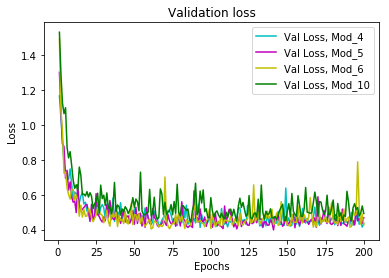

In [26]:
plt.clf()

epochs = range(1, 201)

plt.plot(epochs, loss_4, 'c', label = "Val Loss, Mod_4")
plt.plot(epochs, loss_5, 'm', label = "Val Loss, Mod_5")
plt.plot(epochs, loss_6, 'y', label = "Val Loss, Mod_6")
plt.plot(epochs, loss_10, 'g', label = "Val Loss, Mod_10")

plt.title("Validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Based on the above graph, I decided to drop model 6 and 10.

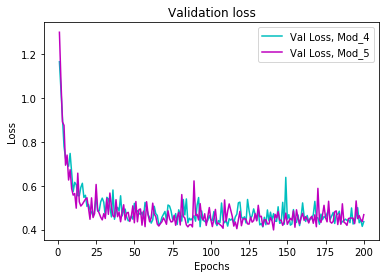

In [31]:
plt.clf()

epochs = range(1, 201)

plt.plot(epochs, loss_4, 'c', label = "Val Loss, Mod_4")
plt.plot(epochs, loss_5, 'm', label = "Val Loss, Mod_5")

plt.title("Validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

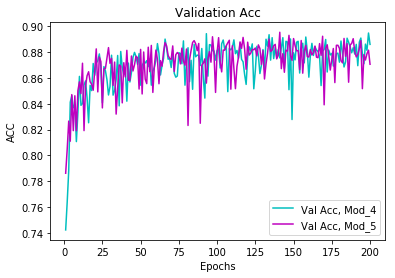

In [46]:
plt.clf()

epochs = range(1, 201)

plt.plot(epochs, acc_4, 'c', label = "Val Acc, Mod_4")
plt.plot(epochs, acc_5, 'm', label = "Val Acc, Mod_5")

plt.title("Validation Acc")
plt.xlabel('Epochs')
plt.ylabel('ACC')
plt.legend()
plt.show()

Here I tried to change the batch sizes...

In [34]:
# Model 4 layer 5, units 128, l2 reg 0.001
model_4_2 = models.Sequential()
model_4_2.add(layers.Dense(128, activation = 'relu', 
                         input_shape=(784,),
                         kernel_regularizer = regularizers.l2(0.001)))

model_4_2.add(layers.Dense(128, activation = 'relu', 
                         kernel_regularizer = regularizers.l2(0.001)))

model_4_2.add(layers.Dense(128, activation = 'relu', 
                         kernel_regularizer = regularizers.l2(0.001)))

model_4_2.add(layers.Dense(128, activation = 'relu', 
                         kernel_regularizer = regularizers.l2(0.001)))

model_4_2.add(layers.Dense(128, activation = 'relu', 
                         kernel_regularizer = regularizers.l2(0.001)))

model_4_2.add(layers.Dense(10, activation = 'softmax'))

model_4_2.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

history_4_2 = model_4_2.fit(x_train_50000, y_train_50000, 
                    batch_size = 256, epochs = 200,
                    validation_data = (x_val, y_val), verbose = 0)

history_dict_4_2 = history_4_2.history
loss_4_2 = history_dict_4_2['val_loss']
acc_4_2 = history_dict_4_2['val_acc']

In [35]:
# Model 5 layer 5 units 256 l2 reg 0.001
model_5_2 = models.Sequential()
model_5_2.add(layers.Dense(256, activation = 'relu', 
                         input_shape=(784,),
                         kernel_regularizer = regularizers.l2(0.001)))

model_5_2.add(layers.Dense(256, activation = 'relu', 
                         kernel_regularizer = regularizers.l2(0.001)))

model_5_2.add(layers.Dense(256, activation = 'relu', 
                         kernel_regularizer = regularizers.l2(0.001)))

model_5_2.add(layers.Dense(256, activation = 'relu', 
                         kernel_regularizer = regularizers.l2(0.001)))

model_5_2.add(layers.Dense(256, activation = 'relu', 
                         kernel_regularizer = regularizers.l2(0.001)))

model_5_2.add(layers.Dense(10, activation = 'softmax'))

model_5_2.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

history_5_2 = model_5_2.fit(x_train_50000, y_train_50000, 
                    batch_size = 256, epochs = 200,
                    validation_data = (x_val, y_val), verbose = 0)

history_dict_5_2 = history_5_2.history
loss_5_2 = history_dict_5_2['val_loss']
acc_5_2 = history_dict_5_2['val_acc']

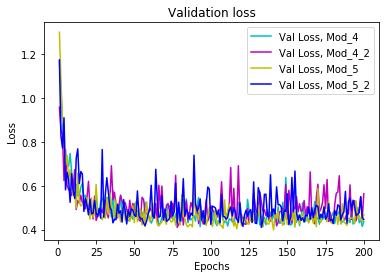

In [37]:
plt.clf()

epochs = range(1, 201)

plt.plot(epochs, loss_4, 'c', label = "Val Loss, Mod_4")
plt.plot(epochs, loss_4_2, 'm', label = "Val Loss, Mod_4_2")
plt.plot(epochs, loss_5, 'y', label = "Val Loss, Mod_5")
plt.plot(epochs, loss_5_2, 'b', label = "Val Loss, Mod_5_2")

plt.title("Validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Decreasing batch size does not seem a good way to improve the models...increase the l2 regularization next.

In [38]:
# Model 4 layer 5, units 128, l2 reg 0.005
model_4_3 = models.Sequential()
model_4_3.add(layers.Dense(128, activation = 'relu', 
                         input_shape=(784,),
                         kernel_regularizer = regularizers.l2(0.005)))

model_4_3.add(layers.Dense(128, activation = 'relu', 
                         kernel_regularizer = regularizers.l2(0.005)))

model_4_3.add(layers.Dense(128, activation = 'relu', 
                         kernel_regularizer = regularizers.l2(0.005)))

model_4_3.add(layers.Dense(128, activation = 'relu', 
                         kernel_regularizer = regularizers.l2(0.005)))

model_4_3.add(layers.Dense(128, activation = 'relu', 
                         kernel_regularizer = regularizers.l2(0.005)))

model_4_3.add(layers.Dense(10, activation = 'softmax'))

model_4_3.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

history_4_3 = model_4_2.fit(x_train_50000, y_train_50000, 
                    batch_size = 512, epochs = 200,
                    validation_data = (x_val, y_val), verbose = 0)

history_dict_4_3 = history_4_3.history
loss_4_3 = history_dict_4_3['val_loss']
acc_4_3 = history_dict_4_3['val_acc']

In [49]:
model_5_3 = models.Sequential()
model_5_3.add(layers.Dense(128, activation = 'relu', 
                         input_shape=(784,),
                         kernel_regularizer = regularizers.l2(0.005)))

model_5_3.add(layers.Dense(128, activation = 'relu', 
                         kernel_regularizer = regularizers.l2(0.005)))

model_5_3.add(layers.Dense(128, activation = 'relu', 
                         kernel_regularizer = regularizers.l2(0.005)))

model_5_3.add(layers.Dense(128, activation = 'relu', 
                         kernel_regularizer = regularizers.l2(0.005)))

model_5_3.add(layers.Dense(128, activation = 'relu', 
                         kernel_regularizer = regularizers.l2(0.005)))

model_5_3.add(layers.Dense(10, activation = 'softmax'))

model_5_3.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

history_5_3 = model_5_3.fit(x_train_50000, y_train_50000, 
                    batch_size = 512, epochs = 200,
                    validation_data = (x_val, y_val), verbose = 0)

history_dict_5_3 = history_5_3.history
loss_5_3 = history_dict_5_3['val_loss']
acc_5_3 = history_dict_5_3['val_acc']

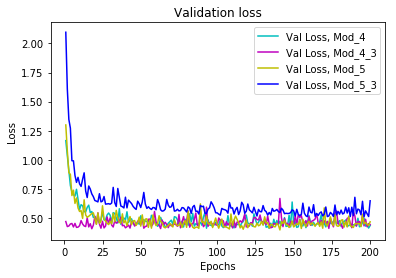

In [50]:
plt.clf()

epochs = range(1, 201)

plt.plot(epochs, loss_4, 'c', label = "Val Loss, Mod_4")
plt.plot(epochs, loss_4_3, 'm', label = "Val Loss, Mod_4_3")
plt.plot(epochs, loss_5, 'y', label = "Val Loss, Mod_5")
plt.plot(epochs, loss_5_3, 'b', label = "Val Loss, Mod_5_3")

plt.title("Validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

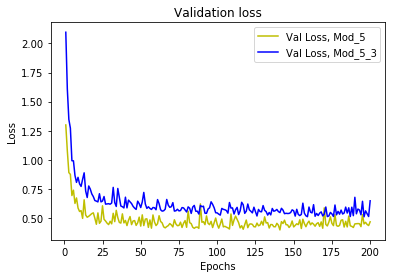

In [51]:
plt.clf()

epochs = range(1, 201)

plt.plot(epochs, loss_5, 'y', label = "Val Loss, Mod_5")
plt.plot(epochs, loss_5_3, 'b', label = "Val Loss, Mod_5_3")

plt.title("Validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

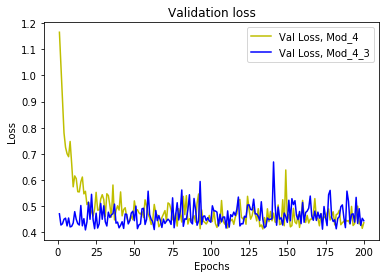

In [52]:
plt.clf()

epochs = range(1, 201)

plt.plot(epochs, loss_4, 'y', label = "Val Loss, Mod_4")
plt.plot(epochs, loss_4_3, 'b', label = "Val Loss, Mod_4_3")

plt.title("Validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

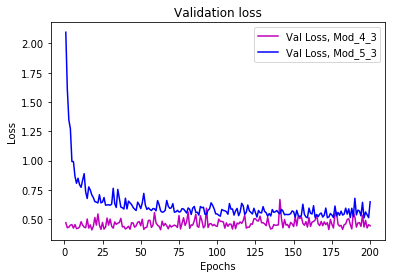

In [53]:
plt.clf()

epochs = range(1, 201)

plt.plot(epochs, loss_4_3, 'm', label = "Val Loss, Mod_4_3")
plt.plot(epochs, loss_5_3, 'b', label = "Val Loss, Mod_5_3")

plt.title("Validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

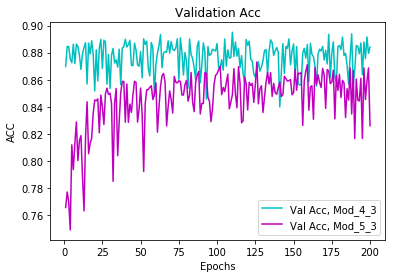

In [54]:
plt.clf()

epochs = range(1, 201)

plt.plot(epochs, acc_4_3, 'c', label = "Val Acc, Mod_4_3")
plt.plot(epochs, acc_5_3, 'm', label = "Val Acc, Mod_5_3")

plt.title("Validation Acc")
plt.xlabel('Epochs')
plt.ylabel('ACC')
plt.legend()
plt.show()

I decided to drop model 5_3

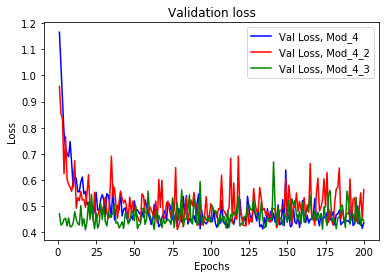

In [59]:
plt.clf()

epochs = range(1, 201)

plt.plot(epochs, loss_4, 'b', label = "Val Loss, Mod_4")
plt.plot(epochs, loss_4_2, 'r', label = "Val Loss, Mod_4_2")
plt.plot(epochs, loss_4_3, 'g', label = "Val Loss, Mod_4_3")

plt.title("Validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

I decided to reduce the number of epoch to 15 and compare mod 4 amd mod 4_3 again

In [83]:
# Model 4 layer 5, units 128, l2 reg 0.001
model_4 = models.Sequential()
model_4.add(layers.Dense(128, activation = 'relu', 
                         input_shape=(784,),
                         kernel_regularizer = regularizers.l2(0.001)))

model_4.add(layers.Dense(128, activation = 'relu', 
                         kernel_regularizer = regularizers.l2(0.001)))

model_4.add(layers.Dense(128, activation = 'relu', 
                         kernel_regularizer = regularizers.l2(0.001)))

model_4.add(layers.Dense(128, activation = 'relu', 
                         kernel_regularizer = regularizers.l2(0.001)))

model_4.add(layers.Dense(128, activation = 'relu', 
                         kernel_regularizer = regularizers.l2(0.001)))

model_4.add(layers.Dense(10, activation = 'softmax'))

model_4.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

history_4 = model_4.fit(x_train_50000, y_train_50000, 
                    batch_size = 512, epochs = 15,
                    validation_data = (x_val, y_val), verbose = 0)

history_dict_4 = history_4.history
loss_4 = history_dict_4['val_loss']
acc_4 = history_dict_4['val_acc']

In [84]:
# Model 4 layer 5, units 128, l2 reg 0.005
model_4_3 = models.Sequential()
model_4_3.add(layers.Dense(128, activation = 'relu', 
                         input_shape=(784,),
                         kernel_regularizer = regularizers.l2(0.005)))

model_4_3.add(layers.Dense(128, activation = 'relu', 
                         kernel_regularizer = regularizers.l2(0.005)))

model_4_3.add(layers.Dense(128, activation = 'relu', 
                         kernel_regularizer = regularizers.l2(0.005)))

model_4_3.add(layers.Dense(128, activation = 'relu', 
                         kernel_regularizer = regularizers.l2(0.005)))

model_4_3.add(layers.Dense(128, activation = 'relu', 
                         kernel_regularizer = regularizers.l2(0.005)))

model_4_3.add(layers.Dense(10, activation = 'softmax'))

model_4_3.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

history_4_3 = model_4_2.fit(x_train_50000, y_train_50000, 
                    batch_size = 512, epochs = 15,
                    validation_data = (x_val, y_val), verbose = 0)

history_dict_4_3 = history_4_3.history
loss_4_3 = history_dict_4_3['val_loss']
acc_4_3 = history_dict_4_3['val_acc']

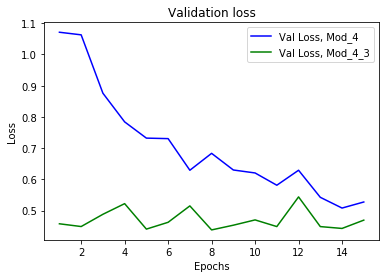

In [85]:
plt.clf()

epochs = range(1, 16)

plt.plot(epochs, loss_4, 'b', label = "Val Loss, Mod_4")
plt.plot(epochs, loss_4_3, 'g', label = "Val Loss, Mod_4_3")

plt.title("Validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

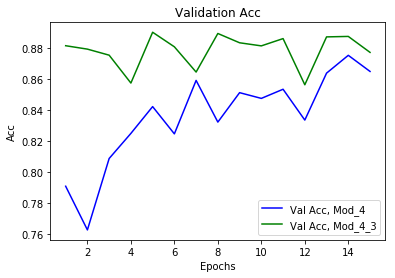

In [86]:
plt.clf()

epochs = range(1, 16)

plt.plot(epochs, acc_4, 'b', label = "Val Acc, Mod_4")
plt.plot(epochs, acc_4_3, 'g', label = "Val Acc, Mod_4_3")

plt.title("Validation Acc")
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

I chose the best model as model 4_3 with 5 layers, 128 hidden units, l2 = 0.005, epoch = 25.